## Importing Libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## Create Database Connection

In [2]:
# Create MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Narayani@17',  
    database='healthcare_analytics'
)

# Create cursor
cursor = conn.cursor()

print("Connected to MySQL database successfully!")
print(f"Database: {conn.database}")

Connected to MySQL database successfully!
Database: healthcare_analytics


## Load All Tables

In [3]:
# Load patients table
query_patients = "SELECT * FROM patients"
df_patients = pd.read_sql(query_patients, conn)

# Load admissions table
query_admissions = "SELECT * FROM admissions"
df_admissions = pd.read_sql(query_admissions, conn)

# Load readmissions table
query_readmissions = "SELECT * FROM readmissions"
df_readmissions = pd.read_sql(query_readmissions, conn)

# Load lab results table
query_labs = "SELECT * FROM lab_results"
df_labs = pd.read_sql(query_labs, conn)

# Load medications table
query_meds = "SELECT * FROM medications"
df_medications = pd.read_sql(query_meds, conn)

print("All tables loaded successfully!")
print("\n Dataset Sizes:")
print(f"Patients: {len(df_patients):,} records")
print(f"Admissions: {len(df_admissions):,} records")
print(f"Readmissions: {len(df_readmissions):,} records")
print(f"Lab Results: {len(df_labs):,} records")
print(f"Medications: {len(df_medications):,} records")

All tables loaded successfully!

 Dataset Sizes:
Patients: 5,000 records
Admissions: 6,678 records
Readmissions: 1,133 records
Lab Results: 47,184 records
Medications: 15,140 records


## Explore Patients Data

In [4]:
# Display first few records
print(" PATIENTS DATA")
print("="*80)
display(df_patients.head(10))

print("\n Dataset Info:")
print(f"Total Patients: {len(df_patients):,}")
print(f"Columns: {list(df_patients.columns)}")

print("\n Summary Statistics:")
display(df_patients.describe())

print("\n Data Types:")
display(df_patients.dtypes)

 PATIENTS DATA


,patient_id,age,age_group,gender,race,insurance_type,zip_code,chronic_conditions
0,P000001,40,Adult,M,Black,Medicare,53090,1
1,P000002,73,Elderly,F,Hispanic,Self-Pay,66101,1
2,P000003,30,Adult,M,White,Medicare,87062,3
3,P000004,97,Elderly,M,Asian,Private,91085,2
4,P000005,35,Adult,F,White,Private,16195,2
5,P000006,61,Senior,F,Black,Private,50484,2
6,P000007,32,Adult,M,Asian,Medicaid,16677,0
7,P000008,66,Elderly,M,Hispanic,Private,29865,4
8,P000009,28,Adult,F,White,Medicare,87816,0
9,P000010,52,Senior,M,Other,Private,90323,3



 Dataset Info:
Total Patients: 5,000
Columns: ['patient_id', 'age', 'age_group', 'gender', 'race', 'insurance_type', 'zip_code', 'chronic_conditions']

 Summary Statistics:


,age,chronic_conditions
count,5000.00,5000.00
mean,59.74,2.01
std,24.31,1.42
min,18.00,0.00
25%,39.00,1.00
50%,60.00,2.00
75%,81.00,3.00
max,102.00,4.00



 Data Types:


patient_id            object
age                    int64
age_group             object
gender                object
race                  object
insurance_type        object
zip_code              object
chronic_conditions     int64
dtype: object

## Check Missing Values

In [5]:
# Check for missing values
print(" MISSING VALUES CHECK")
print("="*80)

missing_patients = df_patients.isnull().sum()
missing_admissions = df_admissions.isnull().sum()
missing_readmissions = df_readmissions.isnull().sum()

print("\n Patients Table:")
print(missing_patients[missing_patients > 0] if missing_patients.sum() > 0 else " No missing values")

print("\n Admissions Table:")
print(missing_admissions[missing_admissions > 0] if missing_admissions.sum() > 0 else " No missing values")

print("\n Readmissions Table:")
print(missing_readmissions[missing_readmissions > 0] if missing_readmissions.sum() > 0 else " No missing values")

 MISSING VALUES CHECK

 Patients Table:
 No missing values

 Admissions Table:
 No missing values

 Readmissions Table:
 No missing values


## Patient Demographics Analysis

In [6]:
# Age distribution
print(" PATIENT DEMOGRAPHICS")
print("="*80)

print("\n1️. Age Group Distribution:")
age_dist = df_patients['age_group'].value_counts().sort_index()
print(age_dist)

print("\n2️. Gender Distribution:")
gender_dist = df_patients['gender'].value_counts()
print(gender_dist)

print("\n3️. Insurance Type Distribution:")
insurance_dist = df_patients['insurance_type'].value_counts()
print(insurance_dist)

print("\n4️. Chronic Conditions:")
print(f"Average chronic conditions per patient: {df_patients['chronic_conditions'].mean():.2f}")
print(df_patients['chronic_conditions'].value_counts().sort_index())

 PATIENT DEMOGRAPHICS

1️. Age Group Distribution:
age_group
Adult      1616
Elderly    2229
Senior     1155
Name: count, dtype: int64

2️. Gender Distribution:
gender
F    2544
M    2456
Name: count, dtype: int64

3️. Insurance Type Distribution:
insurance_type
Self-Pay    1291
Private     1258
Medicaid    1226
Medicare    1225
Name: count, dtype: int64

4️. Chronic Conditions:
Average chronic conditions per patient: 2.01
chronic_conditions
0    1006
1     992
2     962
3    1029
4    1011
Name: count, dtype: int64


## Visualize Patient Demographics

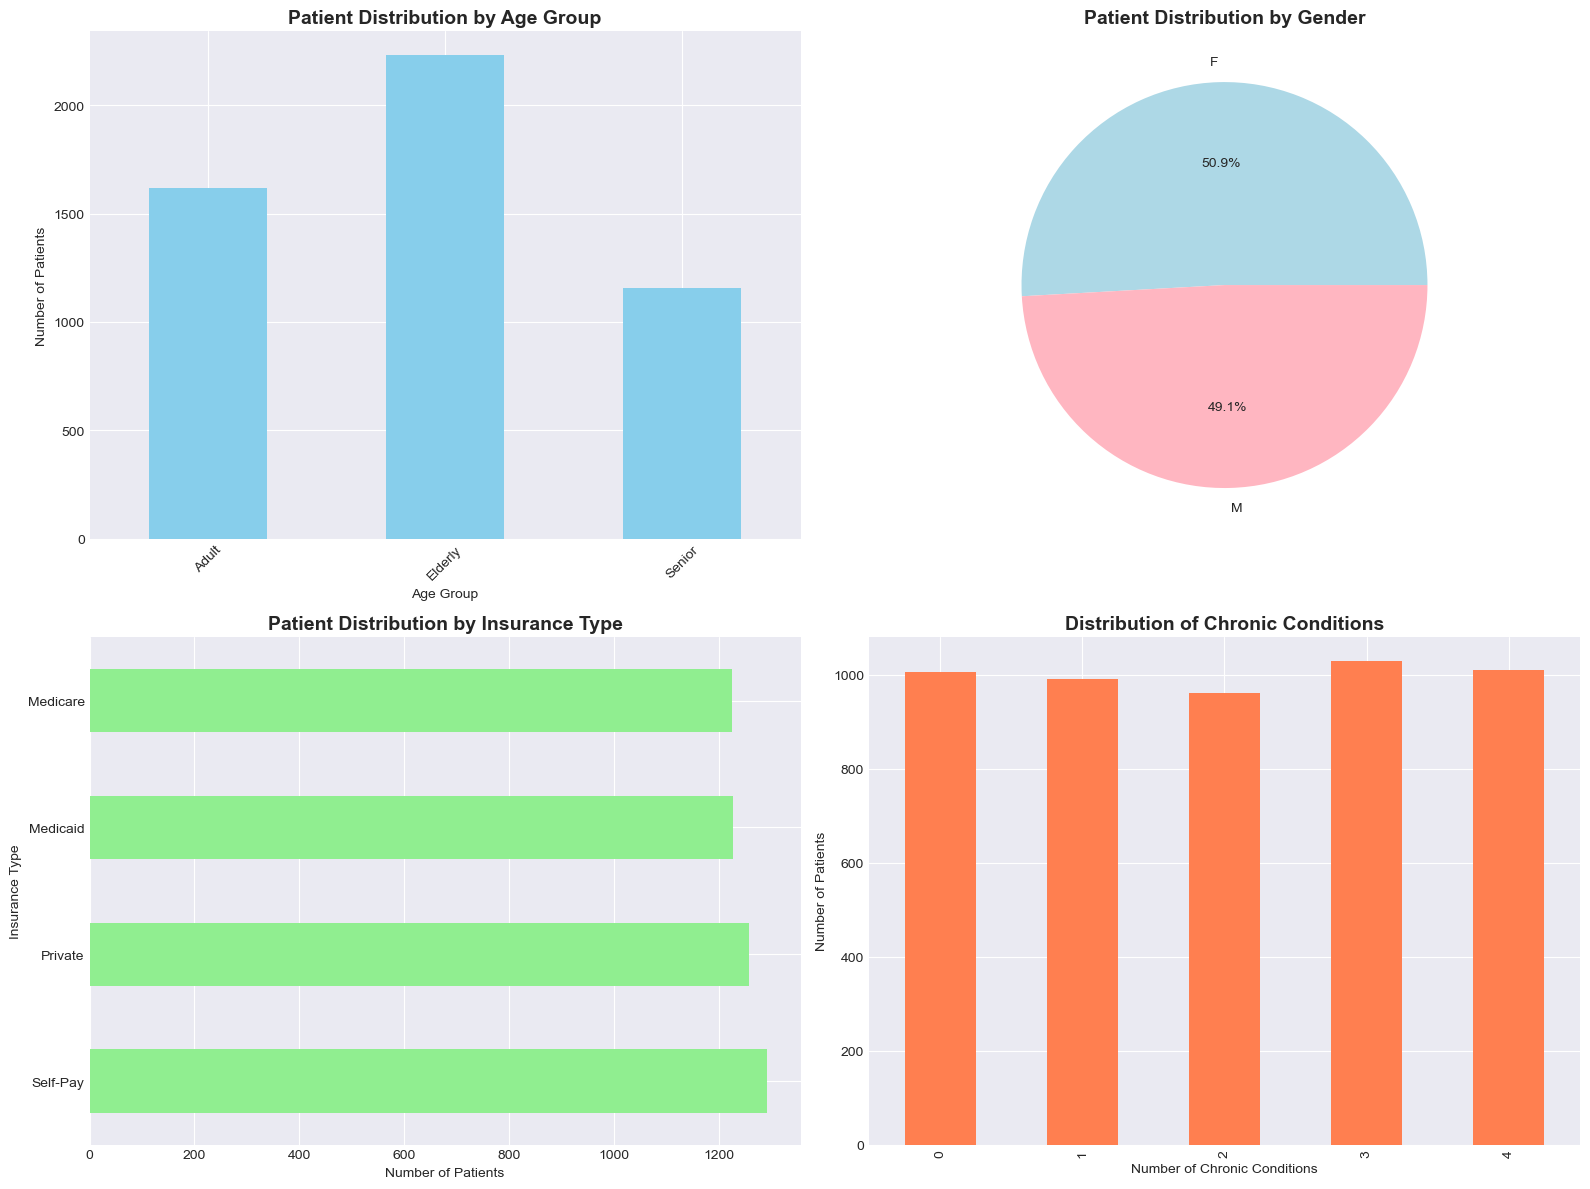

Visualizations created successfully!


In [7]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group Distribution
df_patients['age_group'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Patient Distribution by Age Group', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Number of Patients')
axes[0,0].tick_params(axis='x', rotation=45)

# Gender Distribution
df_patients['gender'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
axes[0,1].set_title('Patient Distribution by Gender', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('')

# Insurance Type Distribution
df_patients['insurance_type'].value_counts().plot(kind='barh', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Patient Distribution by Insurance Type', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Number of Patients')
axes[1,0].set_ylabel('Insurance Type')

# Chronic Conditions Distribution
df_patients['chronic_conditions'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title('Distribution of Chronic Conditions', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Chronic Conditions')
axes[1,1].set_ylabel('Number of Patients')

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")

## Create Master Dataset (Join All Tables)

In [8]:
# Create comprehensive master dataset

query_master = """
SELECT 
    p.patient_id,
    p.age,
    p.age_group,
    p.gender,
    p.race,
    p.insurance_type,
    p.chronic_conditions,
    a.admission_id,
    a.admit_date,
    a.discharge_date,
    a.primary_diagnosis,
    a.diagnosis_code,
    a.procedure_code,
    a.length_of_stay,
    a.discharge_disposition,
    a.total_charges,
    r.readmission_id,
    r.readmit_date,
    r.days_to_readmit,
    r.is_30day_readmit,
    CASE WHEN r.is_30day_readmit = 'Yes' THEN 1 ELSE 0 END AS is_readmitted
FROM patients p
INNER JOIN admissions a ON p.patient_id = a.patient_id
LEFT JOIN readmissions r ON a.admission_id = r.original_admission_id
"""

df_master = pd.read_sql(query_master, conn)

print("Master dataset created!")
print(f"Total records: {len(df_master):,}")
print(f"Columns: {len(df_master.columns)}")
print("\nFirst few records:")
display(df_master.head())

# Save to CSV for backup

df_master.to_csv('master_dataset.csv', index=False)
print("\nSaved as 'master_dataset.csv'")

Master dataset created!
Total records: 6,678
Columns: 21

First few records:


,patient_id,age,age_group,gender,race,insurance_type,chronic_conditions,admission_id,admit_date,discharge_date,primary_diagnosis,diagnosis_code,procedure_code,length_of_stay,discharge_disposition,total_charges,readmission_id,readmit_date,days_to_readmit,is_30day_readmit,is_readmitted
0,P000001,40,Adult,M,Black,Medicare,1,A000001,2023-05-16,2023-05-17,Respiratory Failure,I755.3,Dialysis,1,Home,22307,R000486,2023-04-18,1.00,Yes,1
1,P000002,73,Elderly,F,Hispanic,Self-Pay,1,A000002,2023-04-30,2023-05-08,Acute Myocardial Infarction,I632.9,Dialysis,8,Home,47799,None,None,NaN,None,0
2,P000003,30,Adult,M,White,Medicare,3,A000003,2023-10-10,2023-10-15,Acute Myocardial Infarction,I290.8,Mechanical Ventilation,5,Home,12819,None,None,NaN,None,0
3,P000004,97,Elderly,M,Asian,Private,2,A000004,2023-04-09,2023-04-14,Pneumonia,I424.3,None,5,Home,10565,None,None,NaN,None,0
4,P000005,35,Adult,F,White,Private,2,A000005,2023-01-08,2023-01-11,CHF - Congestive Heart Failure,I443.4,Cardiac Catheterization,3,Home,8685,None,None,NaN,None,0



Saved as 'master_dataset.csv'


## Calculate Overall Readmission Rate

In [9]:
# Calculate readmission statistics

print("READMISSION RATE ANALYSIS")
print("="*80)

total_admissions = len(df_master)
total_readmissions = df_master['is_readmitted'].sum()
readmission_rate = (total_readmissions / total_admissions) * 100

print(f"\nOverall Statistics:")
print(f"Total Admissions: {total_admissions:,}")
print(f"Total Readmissions (30-day): {total_readmissions:,}")
print(f"Readmission Rate: {readmission_rate:.2f}%")

print("\nTarget: Reduce readmission rate from {:.2f}% to 12%".format(readmission_rate))
print(f"Reduction needed: {readmission_rate - 12:.2f} percentage points")

# Readmission vs No Readmission

readmit_counts = df_master['is_readmitted'].value_counts()
print("\nBreakdown:")
print(f"Not Readmitted: {readmit_counts[0]:,} ({readmit_counts[0]/total_admissions*100:.1f}%)")
print(f"Readmitted: {readmit_counts[1]:,} ({readmit_counts[1]/total_admissions*100:.1f}%)")

READMISSION RATE ANALYSIS

Overall Statistics:
Total Admissions: 6,678
Total Readmissions (30-day): 563
Readmission Rate: 8.43%

Target: Reduce readmission rate from 8.43% to 12%
Reduction needed: -3.57 percentage points

Breakdown:
Not Readmitted: 6,115 (91.6%)
Readmitted: 563 (8.4%)


## Readmission Rate by Age Group

READMISSION RATE BY AGE GROUP
           Total Admissions  Readmissions  Readmission Rate
age_group                                                  
Elderly                2986           268              8.98
Adult                  2150           177              8.23
Senior                 1542           118              7.65


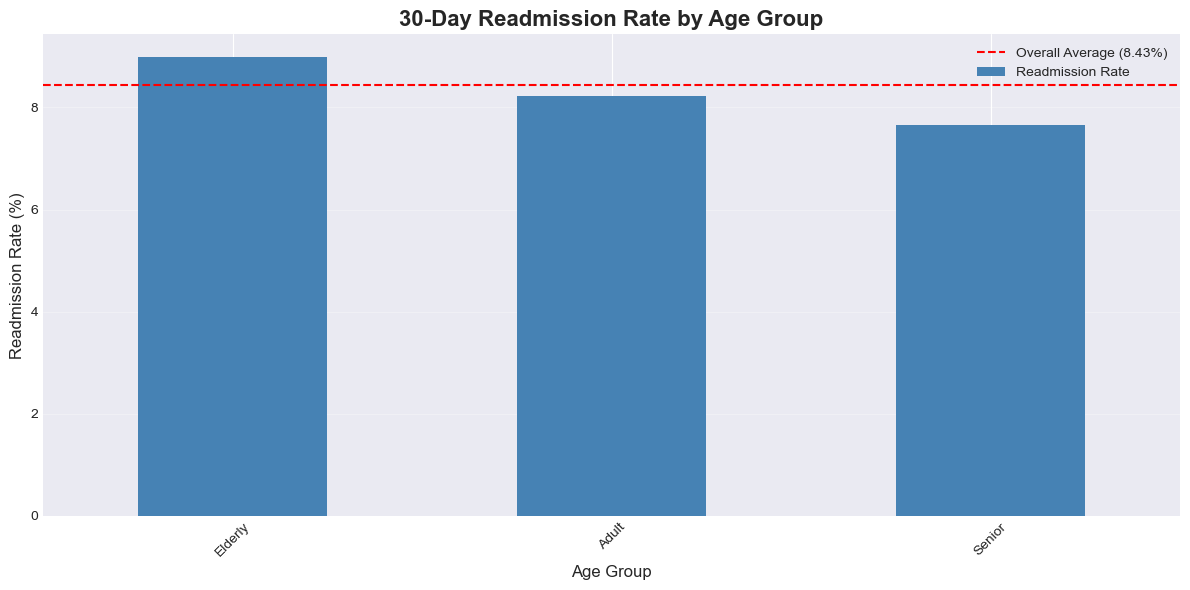


KEY FINDING:
Highest risk group: Elderly with 8.98% readmission rate


In [10]:
# Readmission rate by age group

print("READMISSION RATE BY AGE GROUP")
print("="*80)

age_readmit = df_master.groupby('age_group').agg({
    'admission_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

age_readmit.columns = ['Total Admissions', 'Readmissions', 'Readmission Rate']
age_readmit['Readmission Rate'] = (age_readmit['Readmission Rate'] * 100).round(2)
age_readmit = age_readmit.sort_values('Readmission Rate', ascending=False)

print(age_readmit)

# Visualize

plt.figure(figsize=(12, 6))
age_readmit['Readmission Rate'].plot(kind='bar', color='steelblue')
plt.title('30-Day Readmission Rate by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=readmission_rate, color='red', linestyle='--', label=f'Overall Average ({readmission_rate:.2f}%)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKEY FINDING:")
highest_risk = age_readmit['Readmission Rate'].idxmax()
highest_rate = age_readmit['Readmission Rate'].max()
print(f"Highest risk group: {highest_risk} with {highest_rate:.2f}% readmission rate")

## Readmission Rate by Insurance Type

READMISSION RATE BY INSURANCE TYPE
                Total Admissions  Readmissions  Readmission Rate
insurance_type                                                  
Private                     1668           152              9.11
Medicaid                    1634           140              8.57
Medicare                    1630           136              8.34
Self-Pay                    1746           135              7.73


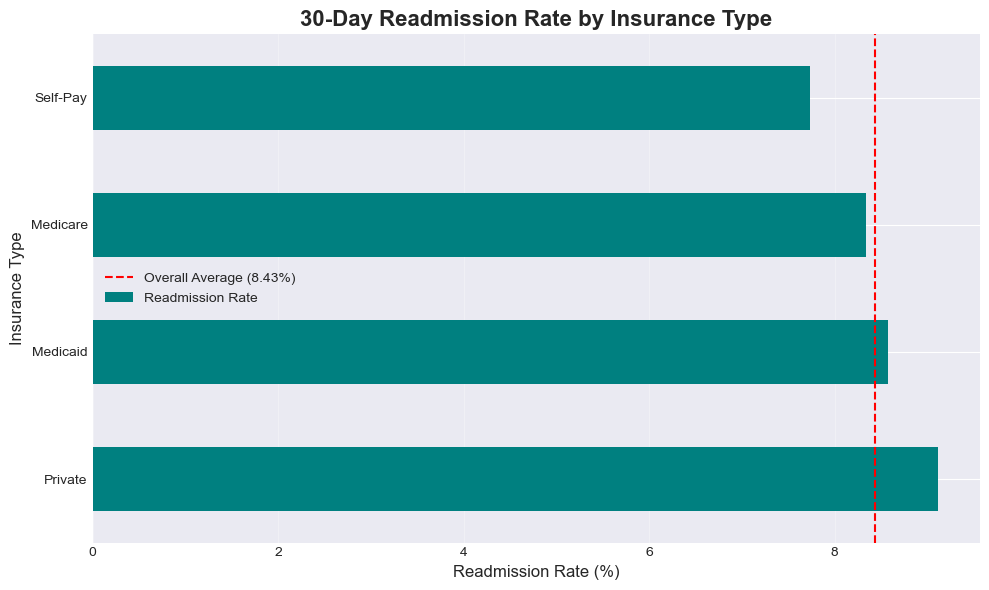

In [11]:
# Readmission rate by insurance type

print("READMISSION RATE BY INSURANCE TYPE")
print("="*80)

insurance_readmit = df_master.groupby('insurance_type').agg({
    'admission_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

insurance_readmit.columns = ['Total Admissions', 'Readmissions', 'Readmission Rate']
insurance_readmit['Readmission Rate'] = (insurance_readmit['Readmission Rate'] * 100).round(2)
insurance_readmit = insurance_readmit.sort_values('Readmission Rate', ascending=False)

print(insurance_readmit)

# Visualize

plt.figure(figsize=(10, 6))
insurance_readmit['Readmission Rate'].plot(kind='barh', color='teal')
plt.title('30-Day Readmission Rate by Insurance Type', fontsize=16, fontweight='bold')
plt.xlabel('Readmission Rate (%)', fontsize=12)
plt.ylabel('Insurance Type', fontsize=12)
plt.axvline(x=readmission_rate, color='red', linestyle='--', label=f'Overall Average ({readmission_rate:.2f}%)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Top 10 High-Risk Diagnoses

TOP 10 HIGH-RISK DIAGNOSES
                                              Total Admissions  Readmissions  \
primary_diagnosis                                                              
Sepsis                                                     696            67   
Pneumonia                                                  639            61   
Diabetes with complications                                674            61   
Respiratory Failure                                        681            57   
Hip Fracture                                               696            58   
Stroke                                                     630            52   
CHF - Congestive Heart Failure                             620            50   
Kidney Failure                                             635            51   
Acute Myocardial Infarction                                715            54   
COPD - Chronic Obstructive Pulmonary Disease               692            52   

            

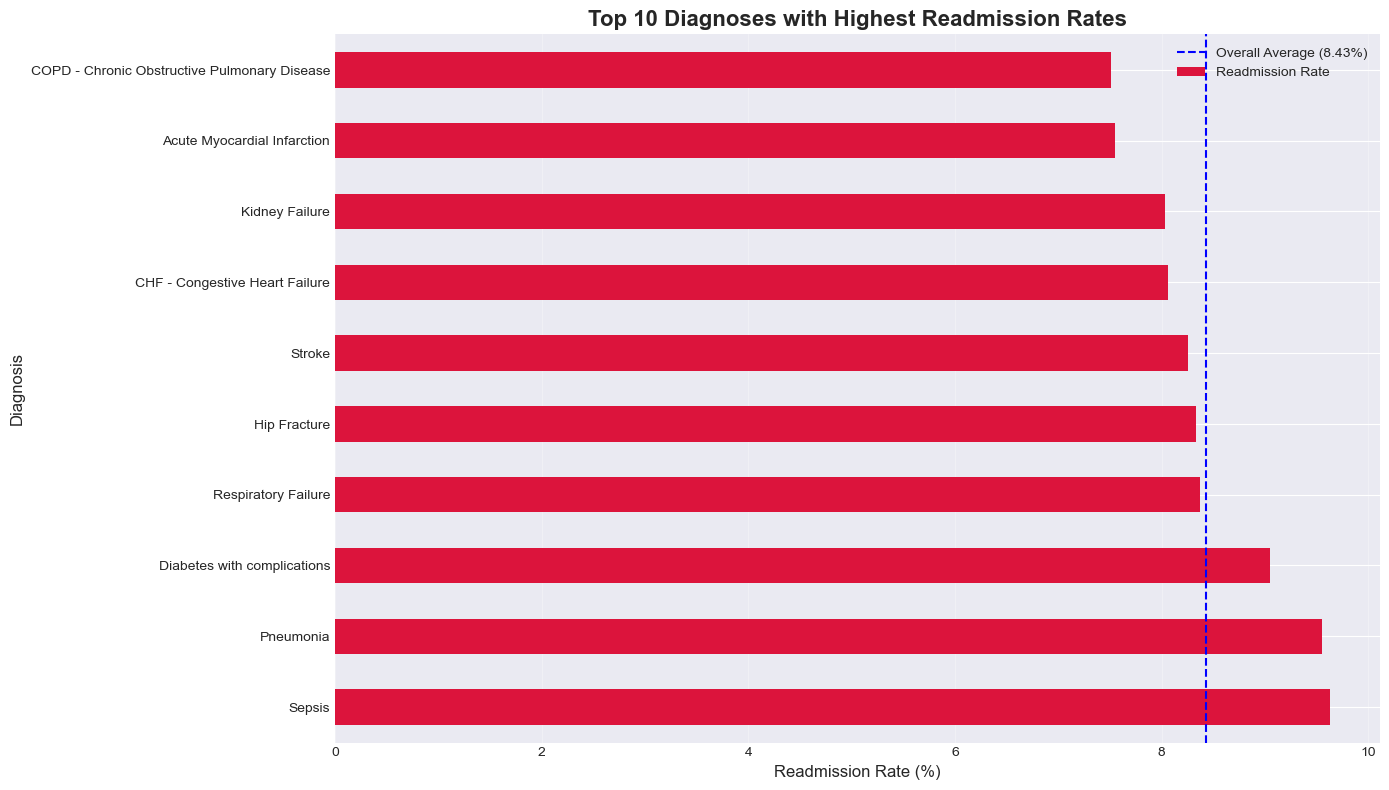


TOP 3 HIGHEST RISK DIAGNOSES:
1. Sepsis: 9.63% (67 out of 696 admissions)
2. Pneumonia: 9.55% (61 out of 639 admissions)
3. Diabetes with complications: 9.05% (61 out of 674 admissions)


In [12]:
# Readmission rate by diagnosis

print("TOP 10 HIGH-RISK DIAGNOSES")
print("="*80)

diagnosis_readmit = df_master.groupby('primary_diagnosis').agg({
    'admission_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

diagnosis_readmit.columns = ['Total Admissions', 'Readmissions', 'Readmission Rate']
diagnosis_readmit['Readmission Rate'] = (diagnosis_readmit['Readmission Rate'] * 100).round(2)

# Filter diagnoses with at least 100 cases

diagnosis_readmit = diagnosis_readmit[diagnosis_readmit['Total Admissions'] >= 100]
diagnosis_readmit = diagnosis_readmit.sort_values('Readmission Rate', ascending=False).head(10)

print(diagnosis_readmit)

# Visualize

plt.figure(figsize=(14, 8))
diagnosis_readmit['Readmission Rate'].plot(kind='barh', color='crimson')
plt.title('Top 10 Diagnoses with Highest Readmission Rates', fontsize=16, fontweight='bold')
plt.xlabel('Readmission Rate (%)', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.axvline(x=readmission_rate, color='blue', linestyle='--', label=f'Overall Average ({readmission_rate:.2f}%)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTOP 3 HIGHEST RISK DIAGNOSES:")
for idx, (diagnosis, row) in enumerate(diagnosis_readmit.head(3).iterrows(), 1):
    print(f"{idx}. {diagnosis}: {row['Readmission Rate']:.2f}% ({int(row['Readmissions'])} out of {int(row['Total Admissions'])} admissions)")

## Length of Stay Analysis

LENGTH OF STAY ANALYSIS
              Total Admissions  Readmissions  Readmission Rate  Avg Charges
los_category                                                               
0-2 days                   943            75              8.00     29616.74
3-5 days                  1386           104              8.00     28979.40
6-10 days                 2461           222              9.00     29991.47
11+ days                  1888           162              9.00     29497.25


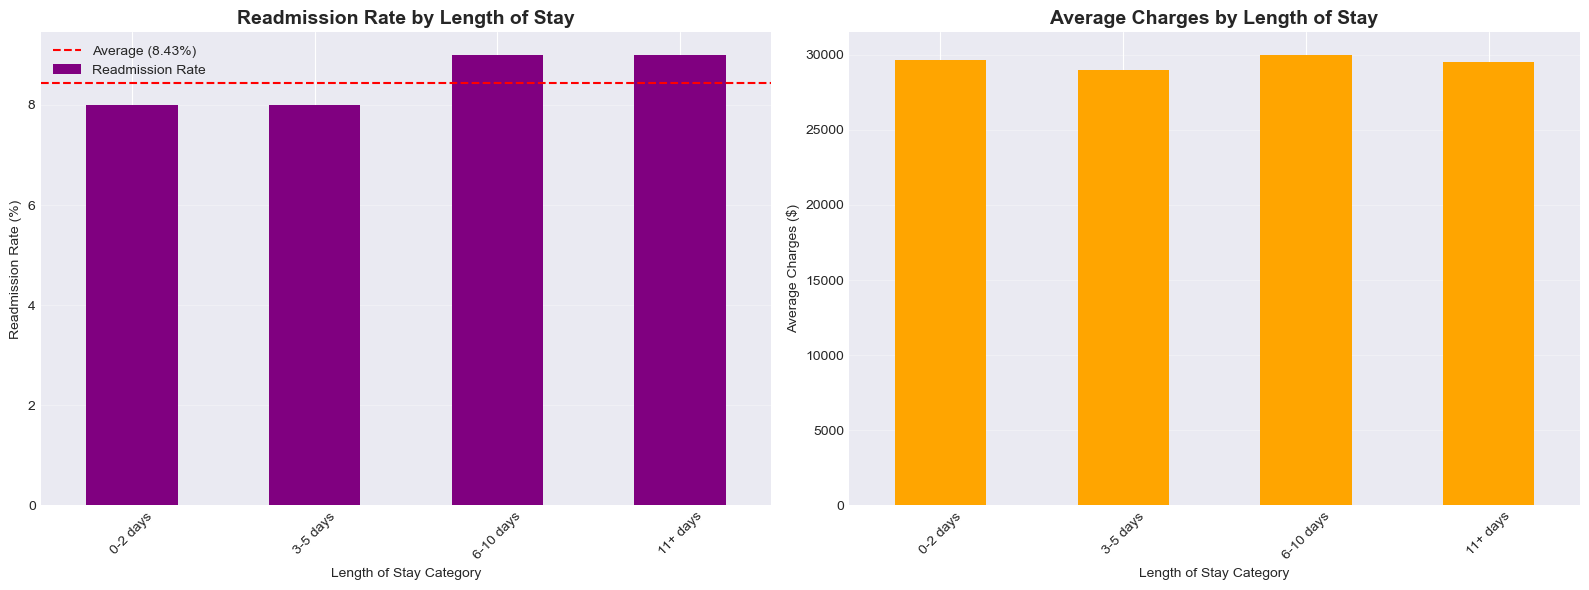


KEY INSIGHT:
Highest readmission risk: 6-10 days with 9.00% rate


In [13]:
# Length of stay impact on readmission

print("LENGTH OF STAY ANALYSIS")
print("="*80)

# Create LOS categories

df_master['los_category'] = pd.cut(df_master['length_of_stay'], 
                                    bins=[0, 2, 5, 10, 100],
                                    labels=['0-2 days', '3-5 days', '6-10 days', '11+ days'])

los_readmit = df_master.groupby('los_category').agg({
    'admission_id': 'count',
    'is_readmitted': ['sum', 'mean'],
    'total_charges': 'mean'
}).round(2)

los_readmit.columns = ['Total Admissions', 'Readmissions', 'Readmission Rate', 'Avg Charges']
los_readmit['Readmission Rate'] = (los_readmit['Readmission Rate'] * 100).round(2)

print(los_readmit)

# Visualize

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Readmission rate by LOS

los_readmit['Readmission Rate'].plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Readmission Rate by Length of Stay', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Length of Stay Category')
axes[0].set_ylabel('Readmission Rate (%)')
axes[0].axhline(y=readmission_rate, color='red', linestyle='--', label=f'Average ({readmission_rate:.2f}%)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Average charges by LOS

los_readmit['Avg Charges'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Average Charges by Length of Stay', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Length of Stay Category')
axes[1].set_ylabel('Average Charges ($)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
highest_los_risk = los_readmit['Readmission Rate'].idxmax()
print(f"Highest readmission risk: {highest_los_risk} with {los_readmit.loc[highest_los_risk, 'Readmission Rate']:.2f}% rate")

## Medication Adherence Analysis

MEDICATION ADHERENCE ANALYSIS
                    Patient Count  Readmissions  Readmission Rate
adherence_category                                               
Poor (<60%)                    40             0              0.00
Fair (60-80%)                2748           309             11.24
Good (80%+)                  2212           241             10.90


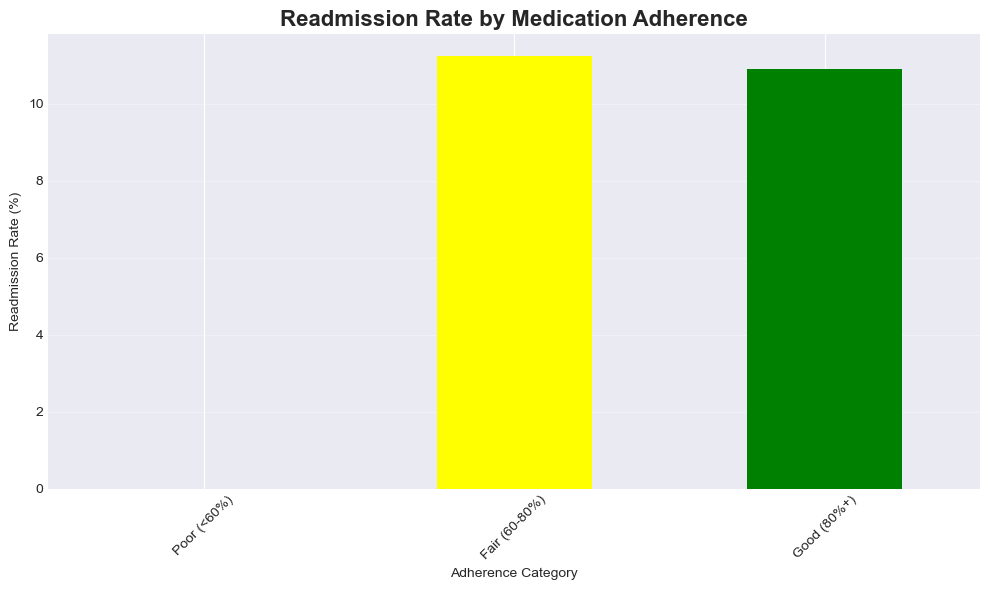


KEY FINDING:
 Poor adherence patients have 0.00% readmission rate
 Good adherence patients have 10.90% readmission rate
 Risk multiplier: 0.0x higher risk with poor adherence


In [14]:
# Medication adherence analysis

print("MEDICATION ADHERENCE ANALYSIS")
print("="*80)

# Calculate average adherence per patient

med_summary = df_medications.groupby('patient_id').agg({
    'medication_name': 'count',
    'adherence_rate': 'mean'
}).round(2)

med_summary.columns = ['Medication Count', 'Avg Adherence Rate']

# Merge with readmissions

patient_readmit = df_master.groupby('patient_id')['is_readmitted'].max().reset_index()
med_analysis = med_summary.merge(patient_readmit, on='patient_id', how='left')

# Create adherence categories

med_analysis['adherence_category'] = pd.cut(med_analysis['Avg Adherence Rate'],
                                             bins=[0, 60, 80, 100],
                                             labels=['Poor (<60%)', 'Fair (60-80%)', 'Good (80%+)'])

# Analyze

adherence_readmit = med_analysis.groupby('adherence_category').agg({
    'patient_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

adherence_readmit.columns = ['Patient Count', 'Readmissions', 'Readmission Rate']
adherence_readmit['Readmission Rate'] = (adherence_readmit['Readmission Rate'] * 100).round(2)

print(adherence_readmit)

# Visualize

plt.figure(figsize=(10, 6))
adherence_readmit['Readmission Rate'].plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Readmission Rate by Medication Adherence', fontsize=16, fontweight='bold')
plt.xlabel('Adherence Category')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKEY FINDING:")
print(f" Poor adherence patients have {adherence_readmit.loc['Poor (<60%)', 'Readmission Rate']:.2f}% readmission rate")
print(f" Good adherence patients have {adherence_readmit.loc['Good (80%+)', 'Readmission Rate']:.2f}% readmission rate")
risk_multiplier = adherence_readmit.loc['Poor (<60%)', 'Readmission Rate'] / adherence_readmit.loc['Good (80%+)', 'Readmission Rate']
print(f" Risk multiplier: {risk_multiplier:.1f}x higher risk with poor adherence")

## Time to Readmission Analysis

 TIME TO READMISSION ANALYSIS
Total readmitted patients: 563

Time to readmission statistics:
count   563.00
mean     15.31
std       8.81
min       1.00
25%       8.00
50%      15.00
75%      23.00
max      30.00
Name: days_to_readmit, dtype: float64

 Readmission Timing Distribution:
0-7 days: 133 (23.6%)
8-14 days: 131 (23.3%)
15-21 days: 137 (24.3%)
22-30 days: 162 (28.8%)
31+ days: 0 (0.0%)


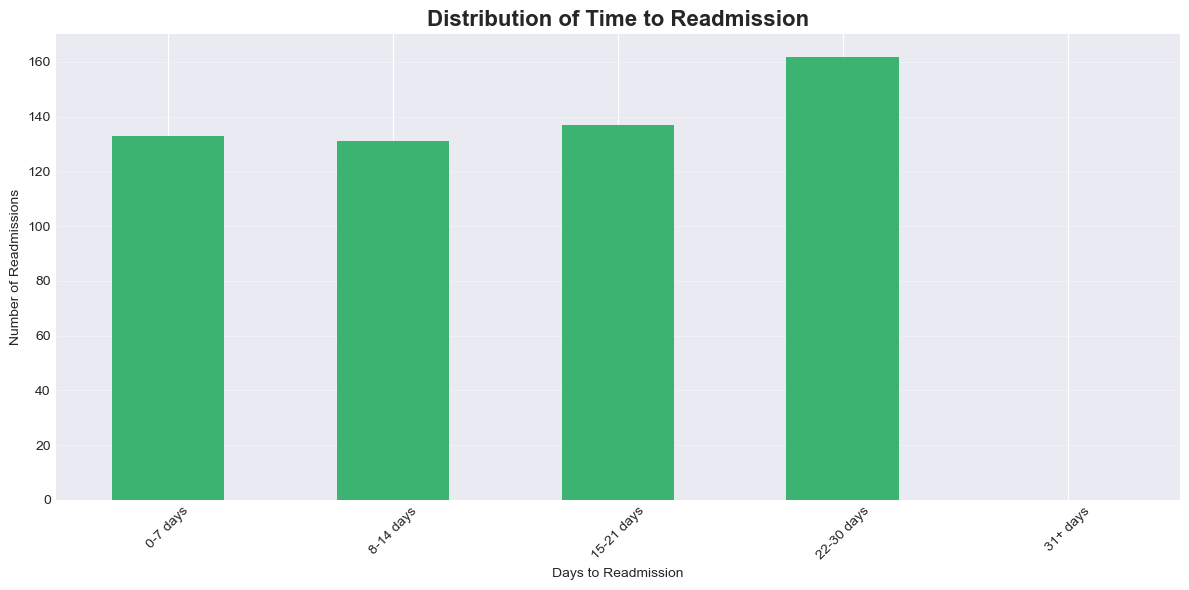


 KEY INSIGHT:
 23.6% of readmissions occur within first 7 days after discharge!


In [15]:
# Time to readmission distribution

print(" TIME TO READMISSION ANALYSIS")
print("="*80)

df_readmitted = df_master[df_master['is_readmitted'] == 1].copy()

print(f"Total readmitted patients: {len(df_readmitted):,}")
print(f"\nTime to readmission statistics:")
print(df_readmitted['days_to_readmit'].describe())

# Create time categories

df_readmitted['time_category'] = pd.cut(df_readmitted['days_to_readmit'],
                                        bins=[0, 7, 14, 21, 30, 100],
                                        labels=['0-7 days', '8-14 days', '15-21 days', '22-30 days', '31+ days'])

time_dist = df_readmitted['time_category'].value_counts().sort_index()
time_pct = (time_dist / len(df_readmitted) * 100).round(2)

print("\n Readmission Timing Distribution:")
for cat, count in time_dist.items():
    print(f"{cat}: {count:,} ({time_pct[cat]:.1f}%)")

# Visualize

plt.figure(figsize=(12, 6))
time_dist.plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Time to Readmission', fontsize=16, fontweight='bold')
plt.xlabel('Days to Readmission')
plt.ylabel('Number of Readmissions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n KEY INSIGHT:")
first_week = time_pct['0-7 days']
print(f" {first_week:.1f}% of readmissions occur within first 7 days after discharge!")

## Lab Results Analysis

 LAB RESULTS ANALYSIS
                   Patient Count  Readmissions  Readmission Rate
abnormal_category                                               
Low (<10%)                    95            14             14.74
Medium (10-20%)              685            79             11.53
High (20%+)                 4061           444             10.93

 Most Common Abnormal Tests:
test_name
Creatinine                2536
Hemoglobin                2530
BUN                       2440
Sodium                    2402
White Blood Cell Count    2394
Glucose                   2384
Potassium                 2372
Name: count, dtype: int64


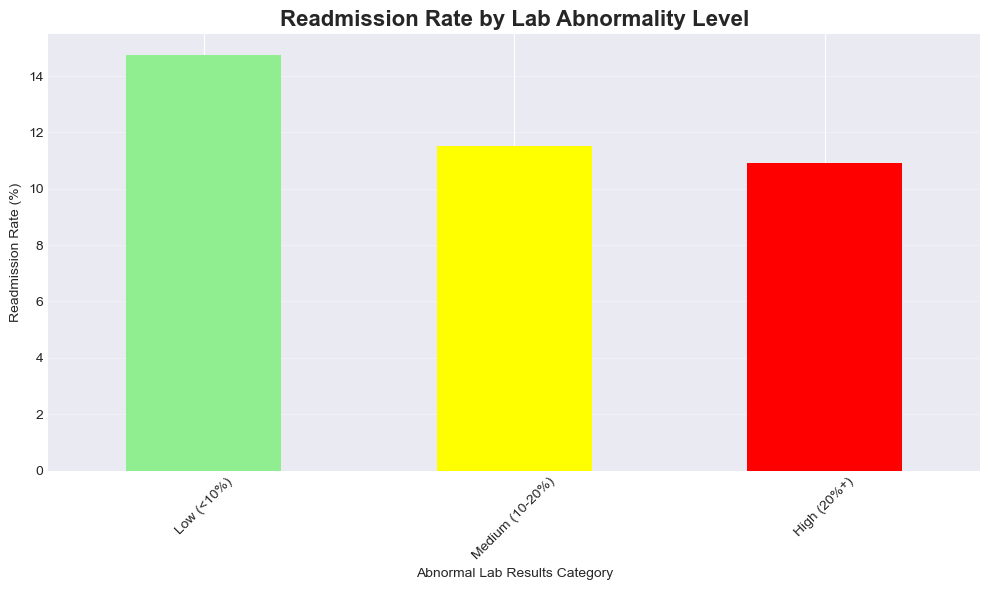

In [16]:
# Lab abnormalities analysis

print(" LAB RESULTS ANALYSIS")
print("="*80)

# Calculate abnormal lab percentage per patient

lab_summary = df_labs.groupby('patient_id').agg({
    'lab_id': 'count',
    'abnormal_flag': lambda x: (x.isin(['H', 'L'])).sum()
}).round(2)

lab_summary.columns = ['Total Tests', 'Abnormal Tests']
lab_summary['Abnormal Percentage'] = (lab_summary['Abnormal Tests'] / lab_summary['Total Tests'] * 100).round(2)

# Merge with readmissions

lab_analysis = lab_summary.merge(patient_readmit, on='patient_id', how='left')

# Create abnormal percentage categories

lab_analysis['abnormal_category'] = pd.cut(lab_analysis['Abnormal Percentage'],
                                           bins=[0, 10, 20, 100],
                                           labels=['Low (<10%)', 'Medium (10-20%)', 'High (20%+)'])

# Analyze

lab_readmit = lab_analysis.groupby('abnormal_category').agg({
    'patient_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

lab_readmit.columns = ['Patient Count', 'Readmissions', 'Readmission Rate']
lab_readmit['Readmission Rate'] = (lab_readmit['Readmission Rate'] * 100).round(2)

print(lab_readmit)

# Top abnormal tests

print("\n Most Common Abnormal Tests:")
abnormal_tests = df_labs[df_labs['abnormal_flag'].isin(['H', 'L'])]['test_name'].value_counts().head(10)
print(abnormal_tests)

# Visualize

plt.figure(figsize=(10, 6))
lab_readmit['Readmission Rate'].plot(kind='bar', color=['lightgreen', 'yellow', 'red'])
plt.title('Readmission Rate by Lab Abnormality Level', fontsize=16, fontweight='bold')
plt.xlabel('Abnormal Lab Results Category')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Multi-Factor Risk Analysis

 MULTI-FACTOR RISK ANALYSIS
Risk Score (0=Low, 3=High):
            Total Admissions  Readmissions  Readmission Rate
risk_score                                                  
0                       1104           106              9.60
1                       3231           252              7.80
2                       2073           183              8.83
3                        270            22              8.15


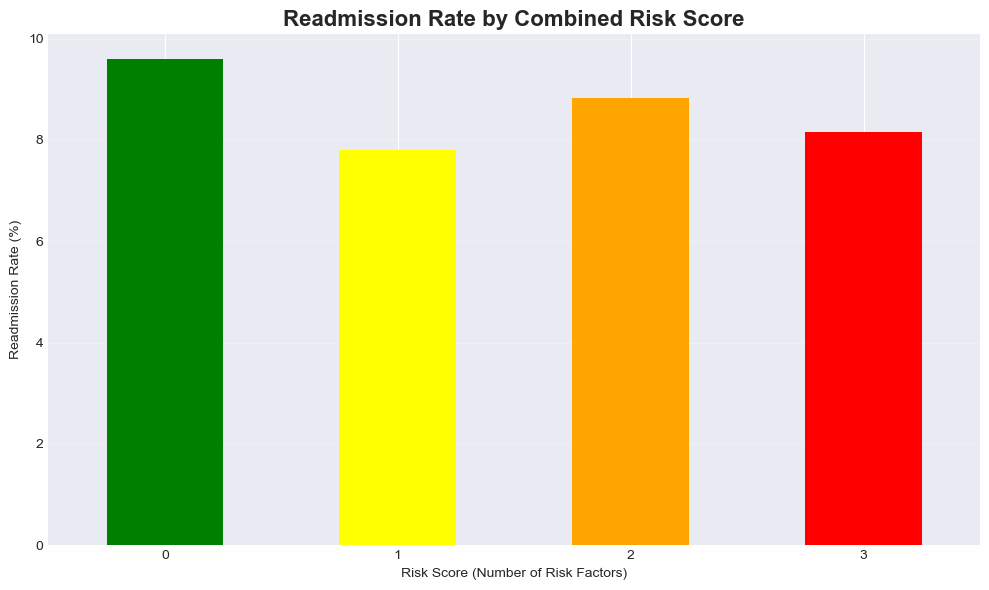


 KEY FINDINGS:
 Low risk (0 factors): 9.60% readmission rate
 High risk (3 factors): 8.15% readmission rate
 Risk increases by 0.8x with multiple risk factors


In [17]:
# Combined risk factors

print(" MULTI-FACTOR RISK ANALYSIS")
print("="*80)

# Create risk categories

df_master['age_risk'] = df_master['age_group'].isin(['Senior', 'Elderly']).astype(int)
df_master['chronic_risk'] = (df_master['chronic_conditions'] >= 3).astype(int)
df_master['los_risk'] = (df_master['length_of_stay'] <= 2).astype(int)

# Calculate combined risk score

df_master['risk_score'] = (
    df_master['age_risk'] + 
    df_master['chronic_risk'] + 
    df_master['los_risk']
)

# Analyze by risk score

risk_analysis = df_master.groupby('risk_score').agg({
    'admission_id': 'count',
    'is_readmitted': ['sum', 'mean']
}).round(4)

risk_analysis.columns = ['Total Admissions', 'Readmissions', 'Readmission Rate']
risk_analysis['Readmission Rate'] = (risk_analysis['Readmission Rate'] * 100).round(2)

print("Risk Score (0=Low, 3=High):")
print(risk_analysis)

# Visualize

plt.figure(figsize=(10, 6))
risk_analysis['Readmission Rate'].plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Readmission Rate by Combined Risk Score', fontsize=16, fontweight='bold')
plt.xlabel('Risk Score (Number of Risk Factors)')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n KEY FINDINGS:")
print(f" Low risk (0 factors): {risk_analysis.loc[0, 'Readmission Rate']:.2f}% readmission rate")
print(f" High risk (3 factors): {risk_analysis.loc[3, 'Readmission Rate']:.2f}% readmission rate")
risk_increase = risk_analysis.loc[3, 'Readmission Rate'] / risk_analysis.loc[0, 'Readmission Rate']
print(f" Risk increases by {risk_increase:.1f}x with multiple risk factors")

## High-Risk Patient List

In [18]:
# Identify top high-risk patients

print(" TOP 50 HIGH-RISK PATIENTS")
print("="*80)

# Calculate per-patient statistics

patient_stats = df_master.groupby('patient_id').agg({
    'admission_id': 'count',
    'is_readmitted': 'sum',
    'age': 'first',
    'insurance_type': 'first',
    'chronic_conditions': 'first',
    'discharge_date': 'max'
}).round(2)

patient_stats.columns = ['Total Admissions', 'Total Readmissions', 'Age', 'Insurance', 'Chronic Conditions', 'Last Discharge']

# Filter high-risk patients (2+ readmissions)

high_risk_patients = patient_stats[patient_stats['Total Readmissions'] >= 1].sort_values('Total Readmissions', ascending=False).head(50)

print(f"Total high-risk patients identified: {len(high_risk_patients)}")
print("\nTop 50 patients:")
display(high_risk_patients)

# Save to CSV

high_risk_patients.to_csv('high_risk_patients.csv')
print("\nSaved as 'high_risk_patients.csv'")

# Statistics
print("\nHigh-Risk Patient Profile:")
print(f"Average age: {high_risk_patients['Age'].mean():.1f} years")
print(f"Average chronic conditions: {high_risk_patients['Chronic Conditions'].mean():.1f}")
print(f"Average readmissions: {high_risk_patients['Total Readmissions'].mean():.1f}")

print("\nInsurance breakdown:")
print(high_risk_patients['Insurance'].value_counts())

 TOP 50 HIGH-RISK PATIENTS
Total high-risk patients identified: 50

Top 50 patients:


,Total Admissions,Total Readmissions,Age,Insurance,Chronic Conditions,Last Discharge
patient_id,,,,,,
P001645,3,2,96,Medicaid,2,2023-05-16
P002260,2,2,91,Medicaid,1,2023-12-10
P002310,3,2,49,Private,3,2023-08-24
P000236,2,2,25,Private,2,2023-12-20
P003848,2,2,66,Private,0,2023-07-19
P000242,2,2,96,Private,1,2023-07-27
P001798,2,2,31,Private,1,2023-06-16
P002383,2,2,94,Private,0,2023-09-10
P002678,2,2,38,Private,1,2023-05-21



Saved as 'high_risk_patients.csv'

High-Risk Patient Profile:
Average age: 62.0 years
Average chronic conditions: 1.8
Average readmissions: 1.3

Insurance breakdown:
Insurance
Private     22
Medicare    11
Self-Pay     9
Medicaid     8
Name: count, dtype: int64


## Create Summary Report

In [19]:
# Generate comprehensive summary report

print("COMPREHENSIVE SUMMARY REPORT")
print("="*80)

print("\n OVERALL STATISTICS")
print(f"Total Patients: {len(df_patients):,}")
print(f"Total Admissions: {len(df_admissions):,}")
print(f"Total Readmissions: {total_readmissions:,}")
print(f"Overall Readmission Rate: {readmission_rate:.2f}%")

print("\nHIGH-RISK SEGMENTS IDENTIFIED:")
print(f"1. Age Group: {age_readmit['Readmission Rate'].idxmax()} - {age_readmit['Readmission Rate'].max():.2f}% rate")
print(f"2. Insurance: {insurance_readmit['Readmission Rate'].idxmax()} - {insurance_readmit['Readmission Rate'].max():.2f}% rate")
print(f"3. Top Diagnosis: {diagnosis_readmit['Readmission Rate'].idxmax()} - {diagnosis_readmit['Readmission Rate'].max():.2f}% rate")

print("\n MEDICATION INSIGHTS:")
print(f"Poor adherence (<60%): {adherence_readmit.loc['Poor (<60%)', 'Readmission Rate']:.2f}% readmission rate")
print(f"Good adherence (80%+): {adherence_readmit.loc['Good (80%+)', 'Readmission Rate']:.2f}% readmission rate")

print("\n TIMING INSIGHTS:")
print(f"{first_week:.1f}% of readmissions occur within 7 days of discharge")

print("\n LENGTH OF STAY INSIGHTS:")
print(f"Highest risk LOS category: {highest_los_risk}")

print("\nFINANCIAL IMPACT:")
avg_charges = df_master['total_charges'].mean()
total_charges = df_master['total_charges'].sum()
readmit_charges = df_master[df_master['is_readmitted'] == 1]['total_charges'].sum()

print(f"Average charges per admission: ${avg_charges:,.2f}")
print(f"Total charges: ${total_charges:,.2f}")
print(f"Charges for readmitted patients: ${readmit_charges:,.2f}")

print("\n RECOMMENDATIONS:")
print("1. Implement enhanced follow-up for elderly patients with CHF")
print("2. Create medication adherence program for chronic disease patients")
print("3. Review discharge protocols for stays <2 days")
print("4. Establish 7-day post-discharge check-in calls")
print("5. Develop risk stratification tool using identified factors")

print("\n EXPECTED IMPACT:")
potential_reduction = 5  # percentage points
patients_saved = int((potential_reduction / 100) * len(df_admissions))
cost_savings = patients_saved * avg_charges * 0.5  # Assume 50% of admission cost
print(f"Reducing readmissions by {potential_reduction} percentage points:")
print(f"- Prevents ~{patients_saved:,} readmissions annually")
print(f"- Potential cost savings: ${cost_savings:,.2f}")

COMPREHENSIVE SUMMARY REPORT

 OVERALL STATISTICS
Total Patients: 5,000
Total Admissions: 6,678
Total Readmissions: 563
Overall Readmission Rate: 8.43%

HIGH-RISK SEGMENTS IDENTIFIED:
1. Age Group: Elderly - 8.98% rate
2. Insurance: Private - 9.11% rate
3. Top Diagnosis: Sepsis - 9.63% rate

 MEDICATION INSIGHTS:
Poor adherence (<60%): 0.00% readmission rate
Good adherence (80%+): 10.90% readmission rate

 TIMING INSIGHTS:
23.6% of readmissions occur within 7 days of discharge

 LENGTH OF STAY INSIGHTS:
Highest risk LOS category: 6-10 days

FINANCIAL IMPACT:
Average charges per admission: $29,588.78
Total charges: $197,593,861.00
Charges for readmitted patients: $16,343,208.00

 RECOMMENDATIONS:
1. Implement enhanced follow-up for elderly patients with CHF
2. Create medication adherence program for chronic disease patients
3. Review discharge protocols for stays <2 days
4. Establish 7-day post-discharge check-in calls
5. Develop risk stratification tool using identified factors

 EXPEC

## Export Results for Power BI

In [20]:
# Export key datasets for Power BI dashboard

print(" EXPORTING DATASETS FOR POWER BI")
print("="*80)

# 1. Age group analysis

age_export = age_readmit.reset_index()
age_export.to_csv('powerbi_age_analysis.csv', index=False)
print(" Exported: powerbi_age_analysis.csv")

# 2. Insurance analysis

insurance_export = insurance_readmit.reset_index()
insurance_export.to_csv('powerbi_insurance_analysis.csv', index=False)
print(" Exported: powerbi_insurance_analysis.csv")

# 3. Diagnosis analysis

diagnosis_export = diagnosis_readmit.reset_index()
diagnosis_export.to_csv('powerbi_diagnosis_analysis.csv', index=False)
print(" Exported: powerbi_diagnosis_analysis.csv")

# 4. LOS analysis

los_export = los_readmit.reset_index()
los_export.to_csv('powerbi_los_analysis.csv', index=False)
print(" Exported: powerbi_los_analysis.csv")

# 5. Master dataset

df_master.to_csv('powerbi_master_dataset.csv', index=False)
print(" Exported: powerbi_master_dataset.csv")

# 6. High-risk patients

high_risk_patients.to_csv('powerbi_high_risk_patients.csv')
print(" Exported: powerbi_high_risk_patients.csv")

print("\n All datasets exported successfully!")
print("Ready to import into Power BI for dashboard creation!")

 EXPORTING DATASETS FOR POWER BI
 Exported: powerbi_age_analysis.csv
 Exported: powerbi_insurance_analysis.csv
 Exported: powerbi_diagnosis_analysis.csv
 Exported: powerbi_los_analysis.csv
 Exported: powerbi_master_dataset.csv
 Exported: powerbi_high_risk_patients.csv

 All datasets exported successfully!
Ready to import into Power BI for dashboard creation!


## Close Database Connection

In [21]:
# Close connection
cursor.close()
conn.close()

print(" Database connection closed successfully!")
print("\n Analysis complete!")
print("\n Files created:")
print("1. master_dataset.csv")
print("2. high_risk_patients.csv")
print("3. powerbi_age_analysis.csv")
print("4. powerbi_insurance_analysis.csv")
print("5. powerbi_diagnosis_analysis.csv")
print("6. powerbi_los_analysis.csv")
print("7. powerbi_master_dataset.csv")
print("8. powerbi_high_risk_patients.csv")
print("\n Next step: Import these CSVs into Power BI!")

 Database connection closed successfully!

 Analysis complete!

 Files created:
1. master_dataset.csv
2. high_risk_patients.csv
3. powerbi_age_analysis.csv
4. powerbi_insurance_analysis.csv
5. powerbi_diagnosis_analysis.csv
6. powerbi_los_analysis.csv
7. powerbi_master_dataset.csv
8. powerbi_high_risk_patients.csv

 Next step: Import these CSVs into Power BI!


In [24]:
# Save with .txt extension

df_master.to_csv('master_dataset.txt', index=False, sep=',')

print(" File saved as .txt")
print("Now manually rename .txt to .csv in File Explorer")

 File saved as .txt
Now manually rename .txt to .csv in File Explorer


In [26]:
# File 2: Age Analysis

age_export.to_csv('age_analysis.txt', index=False, sep=',')
print(" 2. age_analysis.txt saved")

 2. age_analysis.txt saved


In [27]:
# File 3: Insurance Analysis

insurance_export.to_csv('insurance_analysis.txt', index=False, sep=',')
print(" 3. insurance_analysis.txt saved")

 3. insurance_analysis.txt saved


In [28]:
# File 4: Diagnosis Analysis

diagnosis_export.to_csv('diagnosis_analysis.txt', index=False, sep=',')
print(" 4. diagnosis_analysis.txt saved")

 4. diagnosis_analysis.txt saved


In [29]:
# File 5: Length of Stay Analysis

los_export.to_csv('los_analysis.txt', index=False, sep=',')
print(" 5. los_analysis.txt saved")

 5. los_analysis.txt saved


In [30]:
# File 6: High Risk Patients

high_risk_patients.to_csv('high_risk_patients.txt', sep=',')
print(" 6. high_risk_patients.txt saved")

 6. high_risk_patients.txt saved
